In [17]:
cd 11.5.18

[WinError 2] The system cannot find the file specified: '11.5.18'
C:\Users\Thoma\11.5.18


In [56]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "pyber_city.csv"
ride_data_to_load = "pyber_ride.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data = city_data.drop_duplicates('city')
# Combine the data into a single dataset
city_ride = pd.merge(ride_data, city_data)

# Display the data table for preview
city_ride.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2018 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2018 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2018 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2018 14:14,13.89,4.242550e+11,5,Urban


## Bubble Plot of Ride Sharing Data

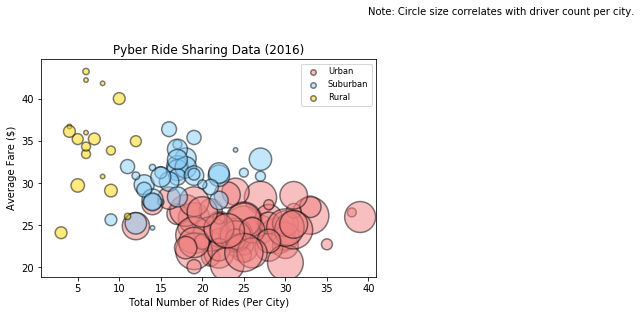

In [57]:
# Obtain the x and y coordinates for each of the three city types
city_ride_df = pd.DataFrame(city_ride)
#x_axis

#y_axis
avg_fare = city_ride.groupby("city")["fare"].mean()
ride_count = city_ride.groupby("city")["ride_id"].count()
city_drivers = city_ride.groupby("city")["driver_count"].mean()
city_type = city_data.set_index('city')['type']

city_pyber_data = pd.DataFrame({"Average Fare per City":avg_fare,
                 "Number of Rides": ride_count,
                 "Number of Drivers": city_drivers,
                 "City Type": city_type
})

urban = city_pyber_data.loc[city_pyber_data['City Type']=="Urban"]
suburban = city_pyber_data.loc[city_pyber_data['City Type']=="Suburban"]
rural = city_pyber_data.loc[city_pyber_data['City Type']=="Rural"]


# Build the scatter plots for each city types

plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], 
            color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*20, 
            label = "Urban", alpha = 0.5, linewidth = 1.5)

plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], 
            color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, 
            label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], 
            color = "gold", edgecolors = "black", s = rural["Number of Drivers"]*20, 
            label = "Rural", alpha = 0.5, linewidth = 1.5)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



# Create a legend

lgnd = plt.legend(fontsize="small", loc='best', mode="expanded", numpoints=1, scatterpoints=1, labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]



# Incorporate a text label regarding circle size
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")


# Save Figure
plt.savefig("Pyber_rideshare.png")

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [20]:
# Show plot
plt.show()

## Total Fares by City Type

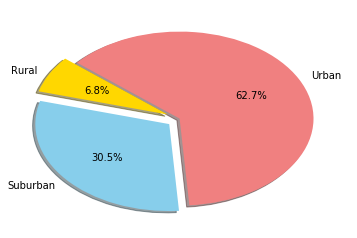

In [60]:
city_ride_df = pd.DataFrame(city_ride)

type_df = city_ride_df.groupby('type')

# Calculate Type Percents
total_rides = city_ride_df["ride_id"].count()
total_fare = city_ride_df['fare'].sum()
fares_by_group = type_df['fare'].sum()


    


fares_by_group_df = pd.DataFrame(rides_by_group)
fares_by_group_df
for type in rides_by_group_df:
    x3 = fares_by_group/total_fare
    

    
    
# Build Pie Chart
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0.1,0.1,0)
labels = ["Rural", "Suburban", "Urban"]
plt.pie(x3, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("type_percent.png")

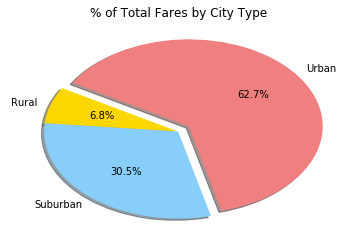

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

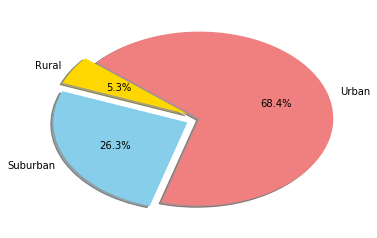

In [61]:
# Calculate Ride Percents
rides_by_group = type_df['type'].count()
rides_by_group_df = pd.DataFrame(rides_by_group)
rides_by_group_df
for type in rides_by_group_df:
    x2 = rides_by_group/total_rides
# Build Pie Chart
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0.1,0.1,0)
labels = ["Rural", "Suburban", "Urban"]
plt.pie(x2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("ride_by_type.png")

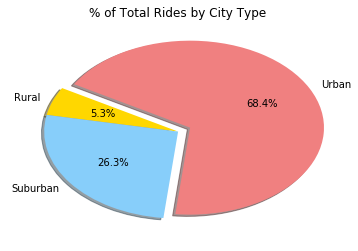

In [5]:
# Show Figure
plt.show()


## Total Drivers by City Type

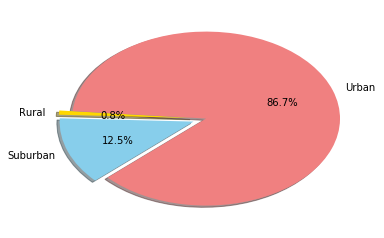

In [62]:
# Calculate Driver Percents
total_drivers = city_ride_df['driver_count'].sum()
driver_count = type_df['driver_count'].sum()

drivers_by_group_df = pd.DataFrame(rides_by_group)

for type in drivers_by_group_df:
    x4 = driver_count/total_drivers
x4
# Build Pie Charts
colors = ['gold', 'skyblue', 'lightcoral']
explode = (0.1,0.1,0)
labels = ["Rural", "Suburban", "Urban"]
plt.pie(x4, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=175)

# Save Figure
plt.savefig("drivers_by_type.png")

In [16]:
# Show Figure
plt.show()